In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/goodreads-or-badreads/sample_submission.csv
/kaggle/input/goodreads-or-badreads/train.csv
/kaggle/input/goodreads-or-badreads/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/goodreads-or-badreads/train.csv")

In [3]:
from datetime import datetime 
df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,3
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,5
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,4
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,5
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,5


In [4]:
df.dtypes

user_id         object
book_id          int64
review_id       object
review_text     object
date_added      object
date_updated    object
read_at         object
started_at      object
n_votes          int64
n_comments       int64
rating           int64
dtype: object

In [5]:
# Function to extract day of the week
def extract_day_of_week(timestamp):
    date_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return date_obj.strftime("%a")

# Apply the function to the 'start_date' column
df['day_of_date_added'] = df['date_added'].apply(extract_day_of_week)

df.head()



,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating,day_of_date_added
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,3,Tue
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,5,Sat
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,4,Tue
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,5,Thu
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,5,Wed


In [6]:
# List of desired columns to extract day of the week
desired_columns = ['date_updated', 'read_at','started_at']

# Function to extract day of the week
def extract_day_of_week(timestamp):
    if pd.isnull(timestamp):  # Check for NaN values
        return None
    date_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return date_obj.strftime("%a")

# Apply the function to desired columns and create new columns
for column in desired_columns:
    df[f'{column}_day'] = df[column].apply(extract_day_of_week)

df.head()


,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating,day_of_date_added,date_updated_day,read_at_day,started_at_day
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,3,Tue,Tue,Mon,Sun
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,5,Sat,Fri,None,None
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,4,Tue,Sat,None,None
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,5,Thu,Thu,Sun,Thu
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,5,Wed,Mon,Mon,Sun


In [7]:
# extract month
desired_columns = ['date_updated', 'read_at','started_at','date_added']

# Function to extract day of the week
def extract_month(timestamp):
    if pd.isnull(timestamp):  # Check for NaN values
        return None
    month_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return month_obj.strftime("%b")

# Apply the function to desired columns and create new columns
for column in desired_columns:
    df[f'{column}_month'] = df[column].apply(extract_month)

df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating,day_of_date_added,date_updated_day,read_at_day,started_at_day,date_updated_month,read_at_month,started_at_month,date_added_month
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,3,Tue,Tue,Mon,Sun,Sep,Sep,Jan,Sep
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,5,Sat,Fri,None,None,Mar,None,None,Mar
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,4,Tue,Sat,None,None,May,None,None,Oct
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,5,Thu,Thu,Sun,Thu,Feb,Sep,Sep,Sep
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,5,Wed,Mon,Mon,Sun,Mar,Mar,Mar,May


In [8]:
# extract month
desired_columns = ['date_updated', 'read_at','started_at','date_added']

# Function to extract day of the week
def extract_date(timestamp):
    if pd.isnull(timestamp):  # Check for NaN values
        return None
    month_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return month_obj.strftime("%d")

# Apply the function to desired columns and create new columns
for column in desired_columns:
    df[f'{column}_date'] = df[column].apply(extract_date)

df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,...,read_at_day,started_at_day,date_updated_month,read_at_month,started_at_month,date_added_month,date_updated_date,read_at_date,started_at_date,date_added_date
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,...,Mon,Sun,Sep,Sep,Jan,Sep,12,11,01,12
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,...,None,None,Mar,None,None,Mar,27,None,None,14
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,...,None,None,May,None,None,Oct,18,None,None,23
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,...,Sun,Thu,Feb,Sep,Sep,Sep,18,06,03,03
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,...,Mon,Sun,Mar,Mar,Mar,May,18,18,17,30


In [9]:
# extract month
desired_columns = ['date_updated', 'read_at','started_at','date_added']

# Function to extract day of the week
def extract_time(timestamp):
    if pd.isnull(timestamp):  # Check for NaN values
        return None
    month_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return month_obj.strftime("%H:%M:%S")

# Apply the function to desired columns and create new columns
for column in desired_columns:
    df[f'{column}_time'] = df[column].apply(extract_time)

df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,...,started_at_month,date_added_month,date_updated_date,read_at_date,started_at_date,date_added_date,date_updated_time,read_at_time,started_at_time,date_added_time
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,...,Jan,Sep,12,11,01,12,17:24:30,00:00:00,00:00:00,17:14:59
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,...,None,Mar,27,None,None,14,12:25:19,None,None,13:28:52
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,...,None,Oct,18,None,None,23,02:19:43,None,None,05:51:53
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,...,Sep,Sep,18,06,03,03,07:11:43,16:42:33,00:00:00,14:18:43
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,...,Mar,May,18,18,17,30,05:37:27,05:37:27,00:00:00,00:44:56


In [10]:
# extract month
desired_columns = ['date_updated', 'read_at','started_at','date_added']

# Function to extract day of the week
def extract_zone(timestamp):
    if pd.isnull(timestamp):  # Check for NaN values
        return None
    month_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return month_obj.strftime("%z")

# Apply the function to desired columns and create new columns
for column in desired_columns:
    df[f'{column}_zone'] = df[column].apply(extract_zone)

df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,...,started_at_date,date_added_date,date_updated_time,read_at_time,started_at_time,date_added_time,date_updated_zone,read_at_zone,started_at_zone,date_added_zone
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,...,01,12,17:24:30,00:00:00,00:00:00,17:14:59,-0700,-0700,-0800,-0700
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,...,None,14,12:25:19,None,None,13:28:52,-0700,None,None,-0700
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,...,None,23,02:19:43,None,None,05:51:53,-0700,None,None,-0700
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,...,03,03,07:11:43,16:42:33,00:00:00,14:18:43,-0800,-0700,-0700,-0700
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,...,17,30,05:37:27,05:37:27,00:00:00,00:44:56,-0700,-0700,-0700,-0700


In [11]:
# extract year
desired_columns = ['date_updated', 'read_at','started_at','date_added']

# Function to extract day of the week
def extract_year(timestamp):
    if pd.isnull(timestamp):  # Check for NaN values
        return None
    month_obj = datetime.strptime(timestamp, "%a %b %d %H:%M:%S %z %Y")
    return month_obj.strftime("%Y")

# Apply the function to desired columns and create new columns
for column in desired_columns:
    df[f'{column}_year'] = df[column].apply(extract_year)

df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,...,started_at_time,date_added_time,date_updated_zone,read_at_zone,started_at_zone,date_added_zone,date_updated_year,read_at_year,started_at_year,date_added_year
0,5845f85c23e768f0636c9c7f77f3a529,7134202,55d9037adc00645b17f0cf43fa4d053e,"I ""read"" this as an audiobook. \n This book fo...",Tue Sep 12 17:14:59 -0700 2017,Tue Sep 12 17:24:30 -0700 2017,Mon Sep 11 00:00:00 -0700 2017,Sun Jan 01 00:00:00 -0800 2017,0,0,...,00:00:00,17:14:59,-0700,-0700,-0800,-0700,2017,2017,2017,2017
1,4251532f32b7e8b98912188f4d962eb1,2767052,e5f389a112b12d560e42e0c5c3d4eb35,Easily one of the best sci-fi books out there ...,Sat Mar 14 13:28:52 -0700 2009,Fri Mar 27 12:25:19 -0700 2009,NaN,NaN,0,0,...,None,13:28:52,-0700,None,None,-0700,2009,None,None,2009
2,2cabd95f62285fc08f4c544afaee5ea4,8492856,e7892549ac69653aceaac86760575aa0,Best. Sarah. Dessen. Book. Ever. And to anyone...,Tue Oct 23 05:51:53 -0700 2012,Sat May 18 02:19:43 -0700 2013,NaN,NaN,0,0,...,None,05:51:53,-0700,None,None,-0700,2013,None,None,2012
3,2d61d345434328a188f805ec75dde2c2,13206760,ab4acc9ad0a24a072356c331880b83d5,"This series just gets better and better, and S...",Thu Sep 03 14:18:43 -0700 2015,Thu Feb 18 07:11:43 -0800 2016,Sun Sep 06 16:42:33 -0700 2015,Thu Sep 03 00:00:00 -0700 2015,0,0,...,00:00:00,14:18:43,-0800,-0700,-0700,-0700,2016,2015,2015,2015
4,a3e696e6ced8daae338eccf12ac58053,7171637,0b65c86a90814e4ab5db50e0cd3dc808,For reviews on all the hottest to the underhyp...,Wed May 30 00:44:56 -0700 2012,Mon Mar 18 05:37:27 -0700 2013,Mon Mar 18 05:37:27 -0700 2013,Sun Mar 17 00:00:00 -0700 2013,0,0,...,00:00:00,00:44:56,-0700,-0700,-0700,-0700,2013,2013,2013,2012


In [12]:
df.dtypes

user_id               object
book_id                int64
review_id             object
review_text           object
date_added            object
date_updated          object
read_at               object
started_at            object
n_votes                int64
n_comments             int64
rating                 int64
day_of_date_added     object
date_updated_day      object
read_at_day           object
started_at_day        object
date_updated_month    object
read_at_month         object
started_at_month      object
date_added_month      object
date_updated_date     object
read_at_date          object
started_at_date       object
date_added_date       object
date_updated_time     object
read_at_time          object
started_at_time       object
date_added_time       object
date_updated_zone     object
read_at_zone          object
started_at_zone       object
date_added_zone       object
date_updated_year     object
read_at_year          object
started_at_year       object
date_added_yea

In [13]:
df1=df

remove null values

In [14]:
# find columns where less than 5 percent of rows have missing data
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

[]

In [15]:
df.isna().sum()

user_id                    0
book_id                    0
review_id                  0
review_text                0
date_added                 0
date_updated               0
read_at                64225
started_at            192037
n_votes                    0
n_comments                 0
rating                     0
day_of_date_added          0
date_updated_day           0
read_at_day            64225
started_at_day        192037
date_updated_month         0
read_at_month          64225
started_at_month      192037
date_added_month           0
date_updated_date          0
read_at_date           64225
started_at_date       192037
date_added_date            0
date_updated_time          0
read_at_time           64225
started_at_time       192037
date_added_time            0
date_updated_zone          0
read_at_zone           64225
started_at_zone       192037
date_added_zone            0
date_updated_year          0
read_at_year           64225
started_at_year       192037
date_added_yea

In [16]:
df.dtypes

user_id               object
book_id                int64
review_id             object
review_text           object
date_added            object
date_updated          object
read_at               object
started_at            object
n_votes                int64
n_comments             int64
rating                 int64
day_of_date_added     object
date_updated_day      object
read_at_day           object
started_at_day        object
date_updated_month    object
read_at_month         object
started_at_month      object
date_added_month      object
date_updated_date     object
read_at_date          object
started_at_date       object
date_added_date       object
date_updated_time     object
read_at_time          object
started_at_time       object
date_added_time       object
date_updated_zone     object
read_at_zone          object
started_at_zone       object
date_added_zone       object
date_updated_year     object
read_at_year          object
started_at_year       object
date_added_yea

In [17]:
df['read_at_zone']

0         -0700
1          None
2          None
3         -0700
4         -0700
          ...  
629995    -0700
629996    -0800
629997    -0800
629998    -0700
629999    -0700
Name: read_at_zone, Length: 630000, dtype: object

In [18]:
df['read_at_is_weekend'] = np.where(df['read_at_day'].isin(['Sun', 'Sat']), 1,0)

In [19]:
df.columns

Index(['user_id', 'book_id', 'review_id', 'review_text', 'date_added',
       'date_updated', 'read_at', 'started_at', 'n_votes', 'n_comments',
       'rating', 'day_of_date_added', 'date_updated_day', 'read_at_day',
       'started_at_day', 'date_updated_month', 'read_at_month',
       'started_at_month', 'date_added_month', 'date_updated_date',
       'read_at_date', 'started_at_date', 'date_added_date',
       'date_updated_time', 'read_at_time', 'started_at_time',
       'date_added_time', 'date_updated_zone', 'read_at_zone',
       'started_at_zone', 'date_added_zone', 'date_updated_year',
       'read_at_year', 'started_at_year', 'date_added_year',
       'read_at_is_weekend'],
      dtype='object')

In [20]:
df['date_added_is_weekend'] = np.where(df['day_of_date_added'].isin(['Sun', 'Sat']), 1,0)


In [21]:
df['date_updated_is_weekend'] = np.where(df['date_updated_day'].isin(['Sun', 'Sat']), 1,0)

In [22]:
df['started_at_is_weekend'] = np.where(df['started_at_day'].isin(['Sun','Sat']),1,0)

In [23]:
df.dtypes

user_id                    object
book_id                     int64
review_id                  object
review_text                object
date_added                 object
date_updated               object
read_at                    object
started_at                 object
n_votes                     int64
n_comments                  int64
rating                      int64
day_of_date_added          object
date_updated_day           object
read_at_day                object
started_at_day             object
date_updated_month         object
read_at_month              object
started_at_month           object
date_added_month           object
date_updated_date          object
read_at_date               object
started_at_date            object
date_added_date            object
date_updated_time          object
read_at_time               object
started_at_time            object
date_added_time            object
date_updated_zone          object
read_at_zone               object
started_at_zon

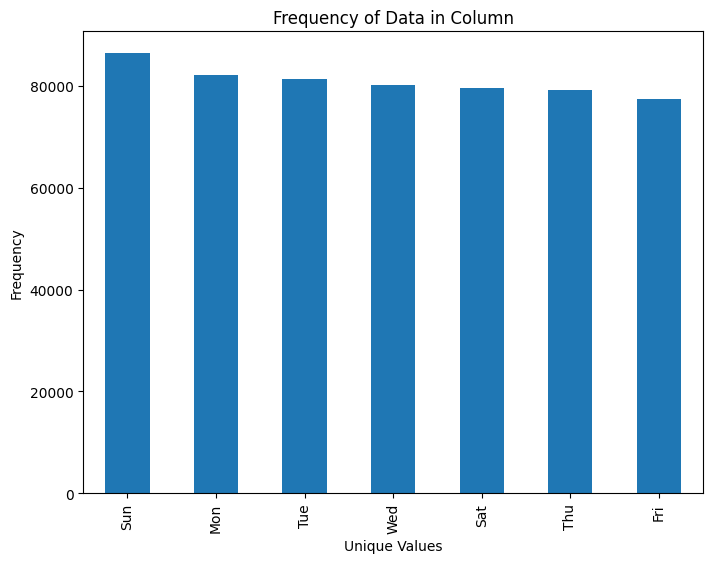

In [24]:
#fill missing values with mode but first see whether the mode is much higher or not
import matplotlib.pyplot as plt

# Count the frequency of each value in the column
value_counts = df['read_at_day'].value_counts()

# Plotting the frequency as a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
value_counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Frequency of Data in Column')
plt.show()


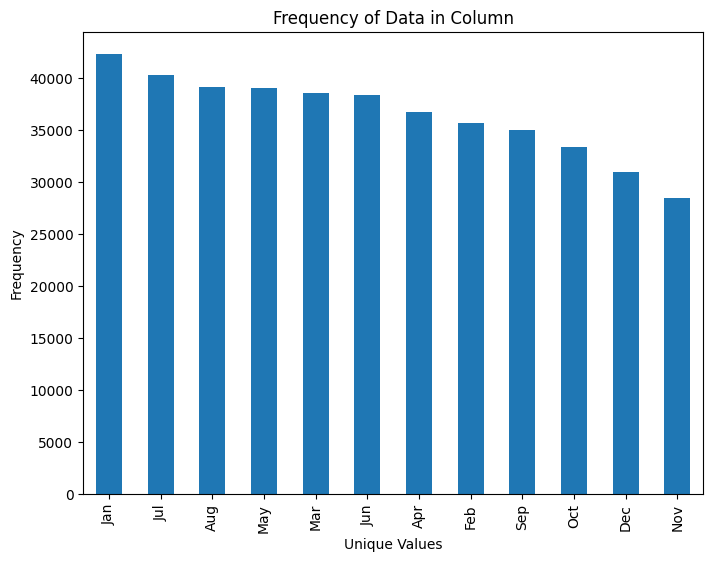

In [25]:
# Count the frequency of each value in the column
value_counts = df['started_at_month'].value_counts()

# Plotting the frequency as a bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
value_counts.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Frequency of Data in Column')
plt.show()